In [86]:
# Projemizde Kullanacağımız Kütüphaneleri import Ederek Başlayalım
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [87]:
# df değişkenine veri dosyamıza atama işlemi gerçekleştirdik
df=pd.read_csv('insurance.csv')

In [88]:
# Tablomuzda ki verileri Görmek için İlk 5 satırı çağırdık
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


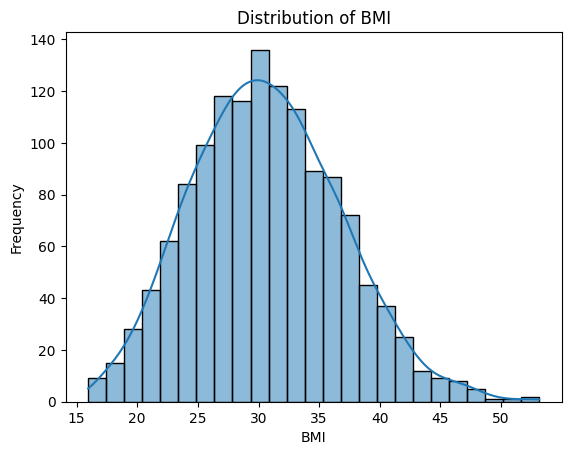

In [89]:
# BMI(Vücut Kitle indeksi) Dağılımını inceliyoruz ve grafiğe döktük
sns.histplot(df['bmi'], kde=True)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.show()


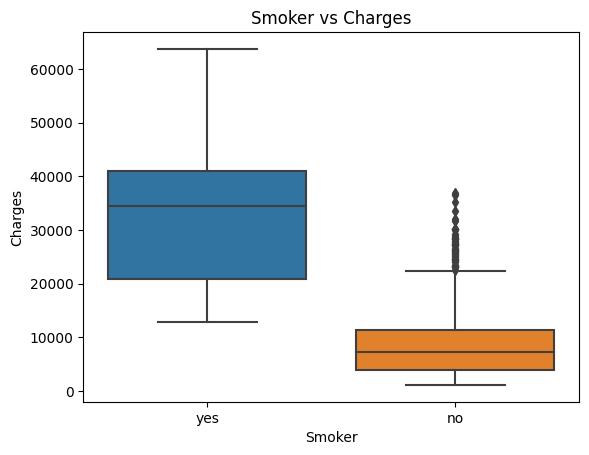

In [90]:
# Sigara içen ve içmeyenlerin masrafların arasında ki durumu grafiğe döktük
sns.boxplot(x='smoker', y='charges', data=df)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Smoker vs Charges')
plt.show()

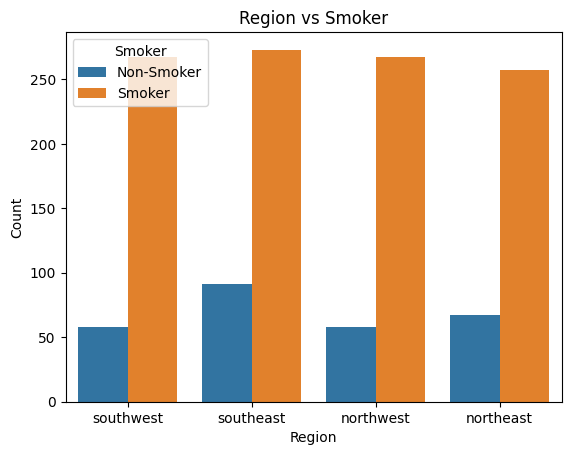

In [91]:
# Bölgelerde ki sigara içim dağılımını grafiğe döktük
sns.countplot(x='region', hue='smoker', data=df)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region vs Smoker')
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])
plt.show()

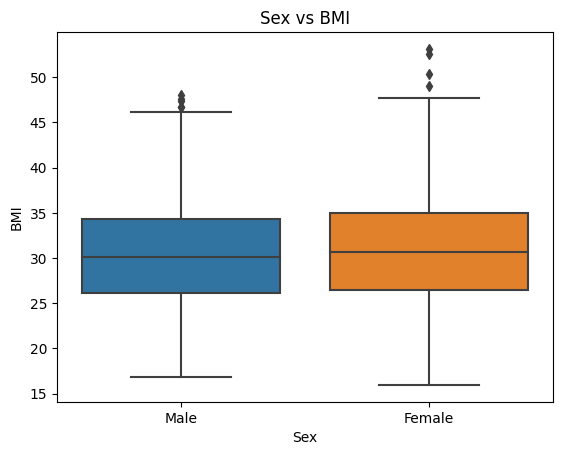

In [92]:
# Kadın ve Erkeklerin Vücut Kitle indekslerinin dağılımını grafiğe döktük
sns.boxplot(x='sex', y='bmi', data=df)
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.title('Sex vs BMI')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

In [93]:
# En çok çocuğun bulunduğu bölgeyi belirledik.
region_with_most_children = df.groupby('region')['children'].sum().idxmax()
print("Region with most children:", region_with_most_children)

Region with most children: southeast


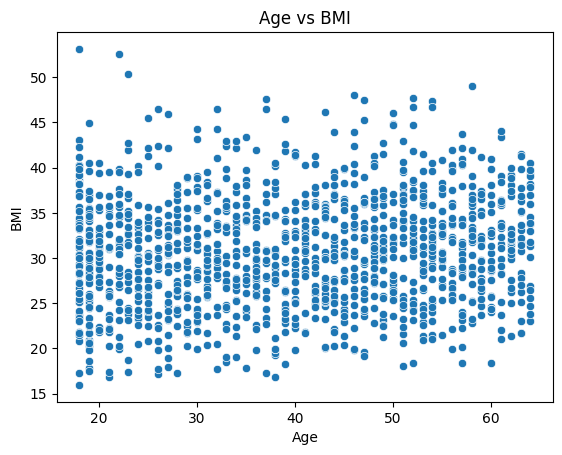

In [94]:
# Yaş ve BMI dağılımını scatterplot kullanarak grafikte gösterdik.
sns.scatterplot(x='age', y='bmi', data=df)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs BMI')
plt.show()

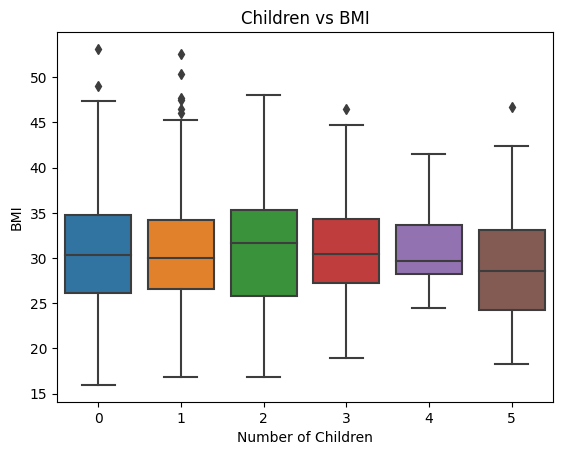

In [95]:
# BMI ve Çocuklar arasında ki ilişkiyi kutu grafiğinde inceledik
sns.boxplot(x='children', y='bmi', data=df)
plt.xlabel('Number of Children')
plt.ylabel('BMI')
plt.title('Children vs BMI')
plt.show()

In [96]:
# "BMI" verilerinde aykırı bir değer olup olmadığını kontrol etme işlemi.
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]

if outliers.empty:
    print("No outliers in the BMI variable.")
else:
    print("Outliers found in the BMI variable.")
    print(outliers[['age', 'sex', 'bmi']])

Outliers found in the BMI variable.
      age     sex    bmi
116    58    male  49.06
286    46  female  48.07
401    47    male  47.52
543    54  female  47.41
847    23    male  50.38
860    37  female  47.60
1047   22    male  52.58
1088   52    male  47.74
1317   18    male  53.13


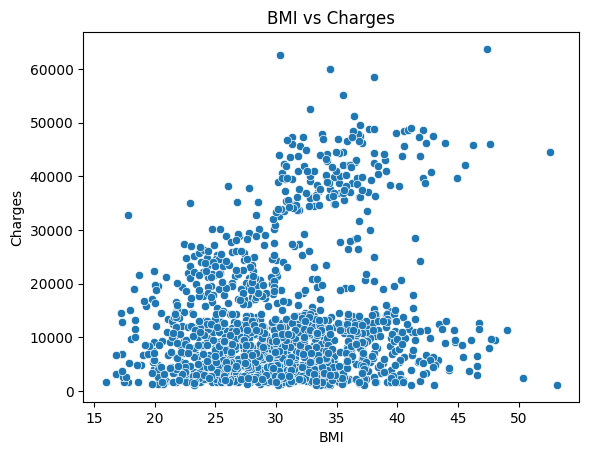

In [97]:
# BMI ve masraflar arasında ki ilişkiyi inceledik.
sns.scatterplot(x='bmi', y='charges', data=df)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges')
plt.show()

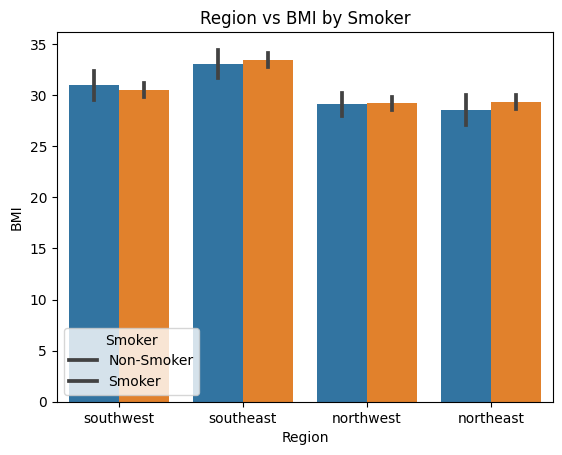

In [98]:
#BMI ve Bölgeler arasında ki ilişkiyi grafiğe dökerek inceledik
sns.barplot(x='region', y='bmi', hue='smoker', data=df)
plt.xlabel('Region')
plt.ylabel('BMI')
plt.title('Region vs BMI by Smoker')
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])
plt.show()

In [99]:

label_encoder = LabelEncoder()

# Label Encoding kullanarak katagorik değişkenleri dönüştürme işlemi
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])

# Region için One-Hot Encoding kullanımı
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
region_encoded = pd.DataFrame(onehot_encoder.fit_transform(df[['region']]))
region_encoded.columns = [f'region{col}' for col in region_encoded.columns]
data = pd.concat([df, region_encoded], axis=1)

# Bölge sütununu tablodan silme işlemi
data.drop('region', axis=1, inplace=True)

In [100]:
X = data.drop('charges', axis=1)
y = data['charges']  # Hedef değişken

# Verileri eğitim ve test setlerine ayırma işlemi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Eğitim verilerini fit metodu ile öğretme ve dönüştürme işlemi
X_train_scaled = scaler.fit_transform(X_train)

# Test verileri üzerinde dönüştürme işlemi yapma
X_test_scaled = scaler.transform(X_test)


In [101]:
# Regression modellerini oluşturma işlemi.
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor()

In [102]:
# Scaled training verilerini kullanarak öodelleri eğitme işlemi
linear_reg.fit(X_train_scaled, y_train)
rf_reg.fit(X_train_scaled, y_train)


RandomForestRegressor()

In [103]:
# cross-validation yöntemi ile verilerin performansını değerlendirme işlemi


linear_scores = cross_val_score(linear_reg, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rf_scores = cross_val_score(rf_reg, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

linear_rmse_scores = np.sqrt(-linear_scores)
rf_rmse_scores = np.sqrt(-rf_scores)

print("Linear Regression RMSE Scores:", linear_rmse_scores)
print("Random Forest RMSE Scores:", rf_rmse_scores)

#Bu kod, Doğrusal Regresyon ve Rastgele Orman modellerini önceden işlenmiş veriler üzerinde
#eğitecek ve ardından çapraz doğrulama kullanarak performanslarını değerlendirecektir.
#Hesaplanan RMSE (Kök Ortalama Karesel Hata) puanları, her modelin ne kadar iyi performans
#gösterdiğine dair size bir fikir verecektir.

Linear Regression RMSE Scores: [6334.96905353 5663.6591115  5992.51101164 6825.71740716 5918.61313625]
Random Forest RMSE Scores: [5048.94527663 4057.20066217 5180.6606751  5528.05057079 5088.50507823]


In [104]:
#
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train_scaled, y_train)
best_rf_model = grid_search.best_estimator_


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END ma

In [105]:
# Regresyon modeli değerlendirme ölçümlerini kullanarak optimize edilmiş modeli değerlendirme işlemi.
y_pred = best_rf_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 19222705.00376026
Mean Absolute Error: 2488.062505145254
